## Importing Modules

In [1]:
import numpy as np 
import os

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [2]:
## Setting up physical Devices:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass    

In [113]:
# Defining Constants 

IMG_WIDTH = 224
IMG_HEIGHT = 224
NUM_CHANNELS = 3   # 3 channels - coloured images 
NUM_CLASSES = 2    # 2 classes - cats & dogs
BATCH_SIZE = 32
EPOCHS = 50

In [116]:
cv2.imread(os.path.join('dataset', 'approved-ss', 'mobile-view'))

# Loading Data:

In [81]:
approved_mobile_path = os.path.join('dataset', 'approved-ss', 'mobile-view')
approved_desktop_path = os.path.join('dataset', 'approved-ss', 'desktop-view')

In [82]:
other_mobile_path = os.path.join('dataset', 'other-ss', 'mobile-view')
other_desktop_path = os.path.join('dataset', 'other-ss', 'desktop-view')

In [83]:
approved_desktop_list = os.listdir(approved_desktop_path)
approved_mobile_list = os.listdir(approved_mobile_path)

other_mobile_list = os.listdir(other_mobile_path)
other_desktop_list = os.listdir(other_desktop_path)

In [90]:
def load_data(path_to_dir, path_to_dir_list, approved=True):
    label = 1
    if not approved:
        label = 0
    imgs = []
    for file in path_to_dir_list:
        # path = os.path.join(path_to_dir, file)
        img = cv2.imread(os.path.join(path_to_dir, file))
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
        # print(len(img))
        imgs.append([img, label])
    return imgs

# load_data(approved_desktop_path, approved_desktop_list, True
            # path to dir         list of imgs file names   labels

In [91]:
# Loading Datasets

In [92]:
approved_mobile_data = load_data(approved_mobile_path, approved_mobile_list, True)
approved_desktop_data = load_data(approved_desktop_path, approved_desktop_list, True)

In [93]:
other_mobile_data = load_data(other_mobile_path, other_mobile_list, False)
other_desktop_data = load_data(other_desktop_path, other_desktop_list, False)

In [94]:
len(other_mobile_data)

147

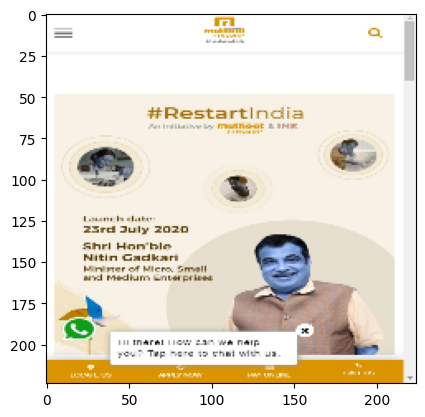

In [112]:
plt.imshow(other_mobile_data[0][0])

## Combining Data, Shuffling both mobile and desktop view collected datasets:

In [95]:
combined_mobile_data = approved_mobile_data + other_mobile_data
combined_desktop_data = approved_desktop_data + other_desktop_data

In [96]:
np.random.seed(30)
np.random.shuffle(combined_mobile_data)
np.random.shuffle(combined_desktop_data)

In [97]:
# Converting to Array:
X_mobile = []
y_mobile = []
X_desktop = []
y_desktop  = []
for img, label in combined_mobile_data:
    X_mobile.append(img)
    y_mobile.append(label)
for img, label in combined_desktop_data:
    X_desktop.append(img)
    y_desktop.append(label)

X_mobile = np.array(X_mobile)
X_desktop = np.array(X_desktop)
y_mobile = np.array(y_mobile)
y_desktop = np.array(y_desktop)

In [101]:
X_mobile.shape

(384, 224, 224, 3)

In [102]:
X_desktop.shape

(378, 224, 224, 3)

## Preprocessing Data:

In [100]:
def preprocess_data(img_data): 
    
    # Normalizing:
    img_data = img_data.astype('float32')
    img_data /= 255.0
    return img_data

In [103]:
X_mobile = preprocess_data(X_mobile)
X_desktop = preprocess_data(X_desktop)

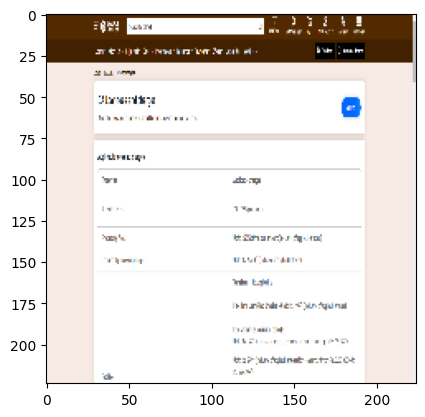

In [107]:
plt.imshow(X_desktop[0])